In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import fsolve

##### getting and clearing data 

In [2]:
data = sp.genfromtxt('web_traffic.tsv', delimiter = '\t')

In [243]:
x = data[:,0]

In [244]:
y = data[:,1]

In [245]:
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

In [246]:
def plot_models(x, y, models, mx=None):
    colors = ['g', 'r', 'b', 'm', 'r']
    linestyles = ['-', '-', '--', ':', '-']
    plt.scatter(x, y, s=10)
    plt.title('web traffic over the last month')
    plt.xlabel('time')
    plt.ylabel('hits/hour')
    plt.xticks([w*7*24 for w in xrange(10)], ['week %s' % w for w in xrange(10)])
    
    if models:
        if mx is None:
            mx=sp.linspace(0, x[-1], 1000)
        for model, color, linestyle in zip(models, colors, linestyles):
            plt.plot(mx, model(mx), linestyle=linestyle, c=color, linewidth=3)
            
    plt.autoscale(tight=True)

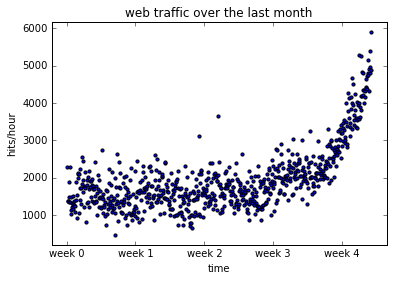

In [247]:
plot_models(x, y, None)

##### opitimization by different polynoms

In [248]:
def error(f, x, y):
    return sp.sum((f(x)-y)**2)

In [249]:
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)

In [250]:
print 'Model parametrs %s' % fp1
print 'Square loss %s' % residuals

Model parametrs [   2.59619213  989.02487106]
Square loss [  3.17389767e+08]


In [251]:
f1 = sp.poly1d(fp1)

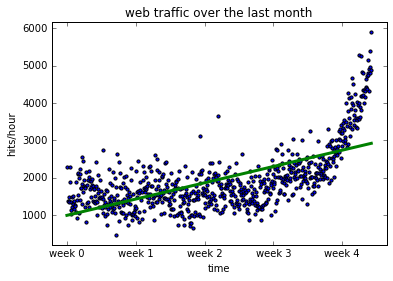

In [252]:
plot_models(x, y, [f1])

In [253]:
print error(f1, x, y)

317389767.34


In [254]:
fp2 = sp.polyfit(x, y, 2)

In [255]:
f2 = sp.poly1d(fp2)

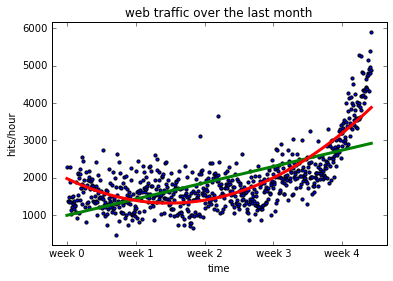

In [256]:
plot_models(x, y, [f1, f2])

In [257]:
print error(f2, x, y)

179983507.878


In [258]:
fp3 = sp.polyfit(x, y, 3)
f3 = sp.poly1d(fp3)

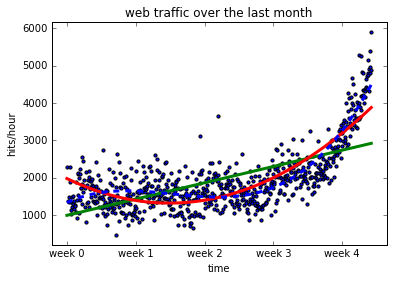

In [259]:
plot_models(x, y, [f1, f2, f3])

In [260]:
fp10 = sp.polyfit(x, y, 10)
f10 = sp.poly1d(fp10)

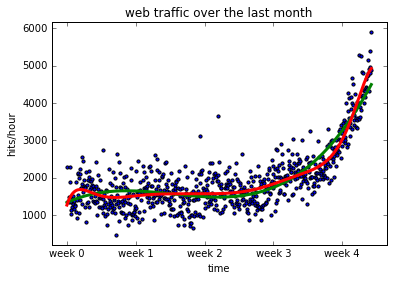

In [261]:
plot_models(x, y, [f3, f10])

In [262]:
fp53 = sp.polyfit(x, y, 53)
f53 = sp.poly1d(fp53)

/Users/gleb/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


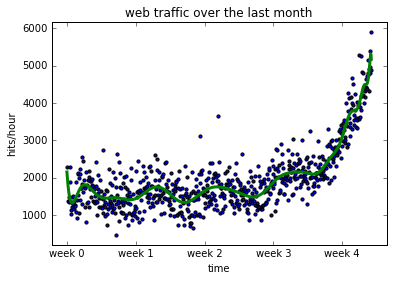

In [263]:
plot_models(x, y, [f53])

In [264]:
print error(f53, x, y)

109452403.444


##### data before inflection point and after

In [265]:
inflection = 3.5*7*24
xa, xb = [x[:inflection], x[inflection:]]
ya, yb = [y[:inflection], y[inflection:]]

/Users/gleb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/Users/gleb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


In [266]:
fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))

residuals of inflection is 132950348.197616


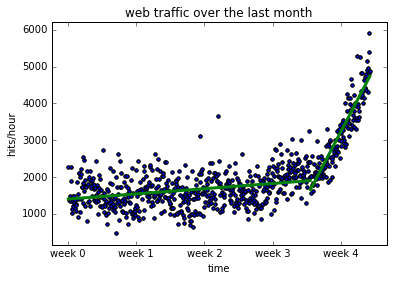

In [267]:
plot_models(x, y, [fa], xa)
plot_models(x, y, [fb], xb)

fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print 'residuals of inflection is %f' % (fa_error + fb_error)

##### extrapolating data after expliction point

In [268]:
fb1=fb
fb2=sp.poly1d(sp.polyfit(xb, yb, 2))
fb3=sp.poly1d(sp.polyfit(xb, yb, 3))
fb10=sp.poly1d(sp.polyfit(xb, yb, 10))
fb53=sp.poly1d(sp.polyfit(xb, yb, 53))

/Users/gleb/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/gleb/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


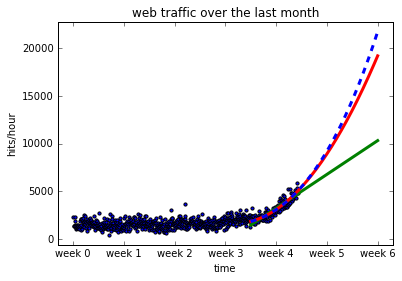

In [269]:
plot_models(x, y, [fb1, fb2, fb3], mx=sp.linspace(len(xa), 6*7*24, 1000))
#fb10 and fb53 ведут себя неадекватно

##### training and testing on a train and test parts of datasets

In [270]:
frac = 0.3
split_idx = int(frac*len(xb))
shuffled = sp.random.permutation(list(range(len(xb))))


In [271]:
train = sorted(shuffled[split_idx:])
test = sorted(shuffled[:split_idx])
print test

[4, 7, 10, 21, 22, 26, 27, 28, 30, 32, 36, 40, 43, 52, 53, 56, 59, 63, 64, 65, 66, 68, 69, 74, 78, 83, 84, 85, 95, 101, 103, 111, 113, 114, 118, 122, 123, 124, 125, 134, 138, 144, 145, 146]


In [272]:
fbtr1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
fbtr2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))
fbtr3 = sp.poly1d(sp.polyfit(xb[train], yb[train], 3))
fbtr10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))
fbtr53 = sp.poly1d(sp.polyfit(xb[train], yb[train], 53))

/Users/gleb/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/gleb/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


In [273]:
#test errors - key values
print error(fbtr1, xb[test], yb[test])
print error

7562259.59777
<function error at 0x10ffe1b18>


In [274]:
for f in [fbtr1, fbtr2, fbtr3, fbtr10, fbtr53]:
    print error(f, xb[test], yb[test])

7562259.59777
6202003.54091
6499563.6211
9109783.93893
7150569.80315


In [275]:
#the best model is 2d polynom, fbtr2 funciton

##### finding solution (when hits/hour will become 100000

In [276]:
time = fsolve(fbtr2-100000, x0=800)/(24*7)

In [277]:
print time[0]

10.7751559073


In [278]:
print fbtr2

         2
0.05623 x - 54.47 x + 1.433e+04
